In [ ]:
from skimage import data, io, filters

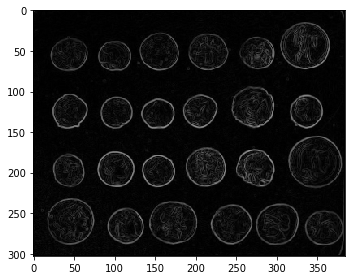

In [ ]:
image = data.coins()
edges = filters.sobel(image)
io.imshow(edges)
io.show()


"""

소벨 필터 가로 / 세로

-1 0 1
-2 0 2
-1 0 1
이런 거!!!
하지만 딱 edge만 검출 하는 것은 아님

"""


In [ ]:
from skimage import data, filters, color
from skimage.morphology import disk

In [ ]:
i = data.coins()
# i = color.rgb2grey(i)

gaussianDenoised = filters.gaussian(noisy, sigma = 2)

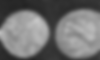

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gaussianDenoised)

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu # data 를 어디서 잘라야 그룹 간의 분산의 차이가 가장 심할까 값을 정해줌

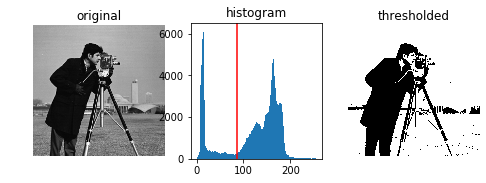

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh # 주어진 값 보다 크면 1, 아니면 0 줘서 2진화

fig, axes = plt.subplots(ncols=3, figsize = (8,2.5))
ax=axes.ravel()


ax[0] = plt.subplot(1,3,1)
ax[1] = plt.subplot(1,3,2)
ax[2] = plt.subplot(1,3,3, sharex = ax[0],sharey=ax[0])


ax[0].imshow(image,cmap = plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].hist(image.ravel(),bins = 256)
ax[1].set_title('histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap = plt.cm.gray)
ax[2].set_title('thresholded')
ax[2].axis('off')


plt.show()

In [ ]:
#histogram matching

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import exposure
from skimage.transform import match_histograms


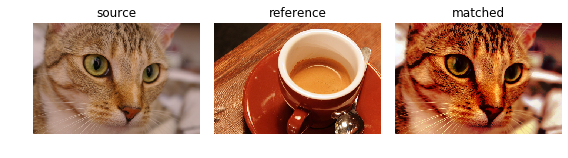

In [ ]:

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize = (8,3), sharex = True, sharey = True)

for aa in (ax1, ax2, ax3):
  aa.set_axis_off()
  
ax1.imshow(image)
ax1.set_title("source")

ax2.imshow(reference)
ax2.set_title("reference")

ax3.imshow(matched)
ax3.set_title("matched")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (8,8))

for i, img in enumerate((image, reference, matched)):
  for c, cColor in enumerate(('red','green','blue')):
    

In [ ]:
#image segmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram

Text(0.5, 1.0, 'histogram of gray val')

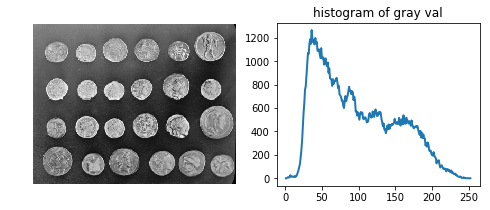

In [ ]:
coins = data.coins()

hist, histCenters = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize = (8,3))

axes[0].imshow(coins, cmap = plt.cm.gray)
axes[0].axis('off')
axes[1].plot(histCenters, hist,lw = 2)
axes[1].set_title('histogram of gray val')

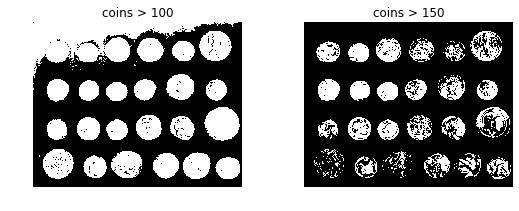

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (8,3),sharey = True)

axes[0].imshow(coins>100, cmap = plt.cm.gray)
axes[0].set_title('coins > 100')
axes[1].imshow(coins>150, cmap = plt.cm.gray)
axes[1].set_title('coins > 150')


for a in axes :
  a.axis('off')
  
plt.tight_layout()

In [ ]:
# edge based
# segmentaion noise 제거 -> gradient -> pixel 값 정리 (ex. 0.01 -> 0, 0.13 -> 0.1 변경) -> thresholding

(-0.5, 383.5, 302.5, -0.5)

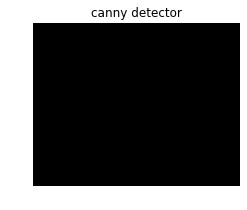

In [ ]:
from skimage.feature import canny

edges = canny(coins)

fit, ax = plt.subplots(figsize = (4,3))
ax.imshow(edges, cmap = plt.cm.gray)
ax.set_title('canny detector')
ax.axis('off')

In [ ]:
from scipy import ndimage as ndi

(-0.5, 383.5, 302.5, -0.5)

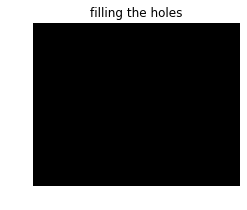

In [ ]:
fillCoins = ndi.binary_fill_holes(edges)

fig,ax = plt.subplots(figsize = (4,3))

ax.imshow(fillCoins, cmap = plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')